In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#Loading data
abalone_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone_data = pd.read_csv(abalone_url, header = None)
abalone_data.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings']
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# Number of rows and columns
abalone_data.shape

(4177, 9)

In [6]:
#Getting some information about the data
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
# Checking for missing values
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# Getting some statistical measures about the data
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


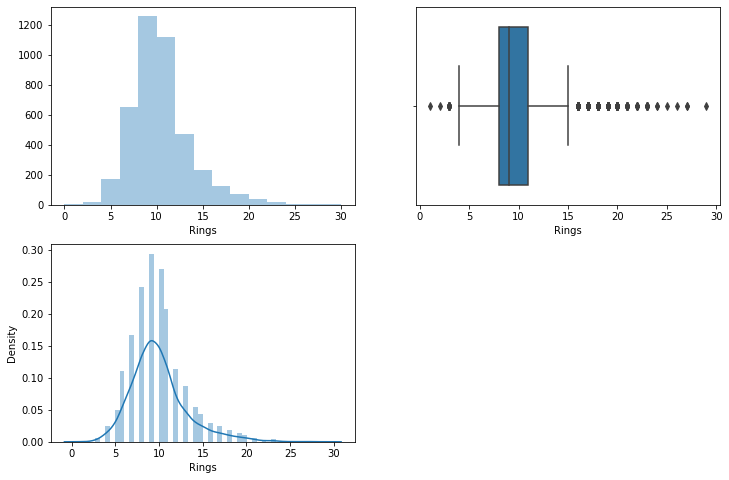

In [12]:
# Visualization of the target attribute

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

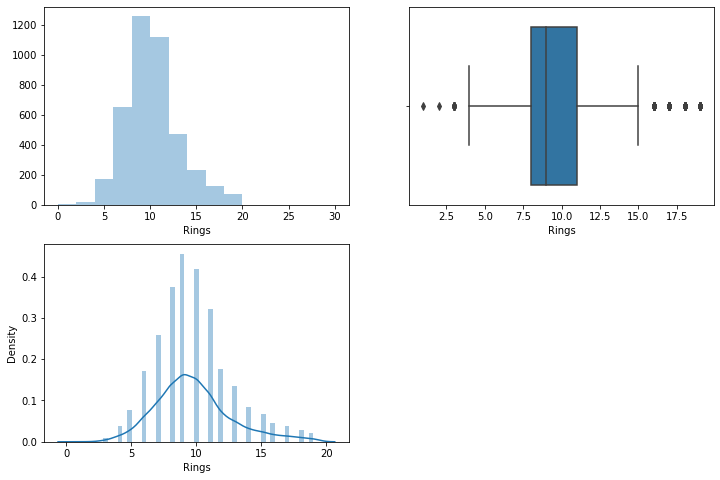

In [13]:
# Removing the outlier from the target attribute

abalone_data = abalone_data[abalone_data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

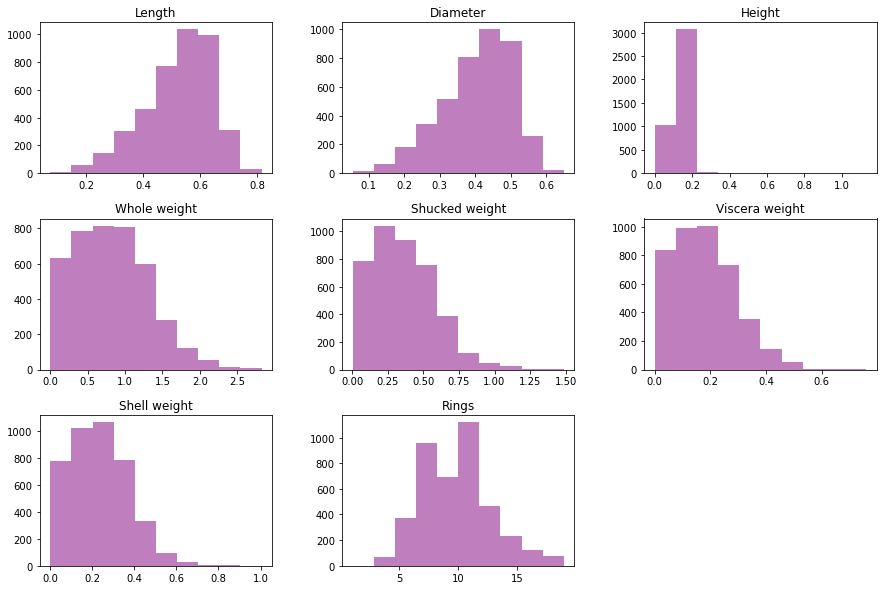

In [51]:
# Visulaize attributes
abalone_data.iloc[:,:8].hist(figsize=(15,10), grid = False, alpha = 0.5, color = 'purple')

In [14]:
# convert categorical Sex into binary numeric by one-hot encoding
abalone_data = pd.get_dummies(abalone_data)
abalone_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


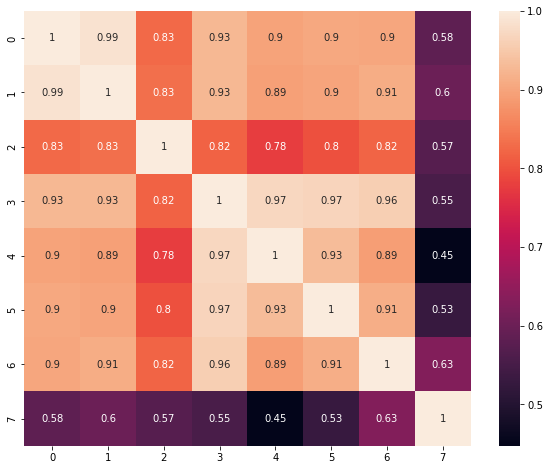

In [20]:
#calculate the correlation matrix

plt.figure(figsize=(10, 8))
corr = DataFrame(abalone_data.iloc[:,:8].corr()).values
sns.heatmap(corr, annot=True);

In [23]:
# Separating features and target
X = abalone_data.drop(columns = "Rings")
y = abalone_data["Rings"]

In [24]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [26]:
#Building the model
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [27]:
# Training the Logistic Regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Model evaluation

# accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[10  9  8 ...  9  9 10]


In [29]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy score of training data : ", training_data_accuracy)

Accuracy score of training data :  0.26666666666666666


In [35]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[9 7 9 ... 8 9 9]


In [36]:
test_data_accuracy = accuracy_score (y_test, X_test_prediction)
print("Accuracy score of test data : ", test_data_accuracy)

Accuracy score of test data :  0.25020242914979757


In [37]:
# Decision Tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 0, max_depth = 3)
#training classifier
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
# test the model
X_test_pred = model_dt.predict(X_test)

In [42]:
# Accuracy
accuracy = accuracy_score(y_test, X_test_pred)
print(accuracy)

0.2631578947368421


In [52]:
#Cross validation

from sklearn.model_selection import cross_validate
cross_validate(model_dt, X_test, y_test, cv=5)

{'fit_time': array([0.0180006 , 0.00799394, 0.00700092, 0.00499892, 0.00399971]),
 'score_time': array([0.00400257, 0.00300002, 0.0040009 , 0.0019989 , 0.00199962]),
 'test_score': array([0.25101215, 0.25101215, 0.28744939, 0.28744939, 0.23481781])}

In [53]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, X_test_pred)
mae

1.6048582995951417

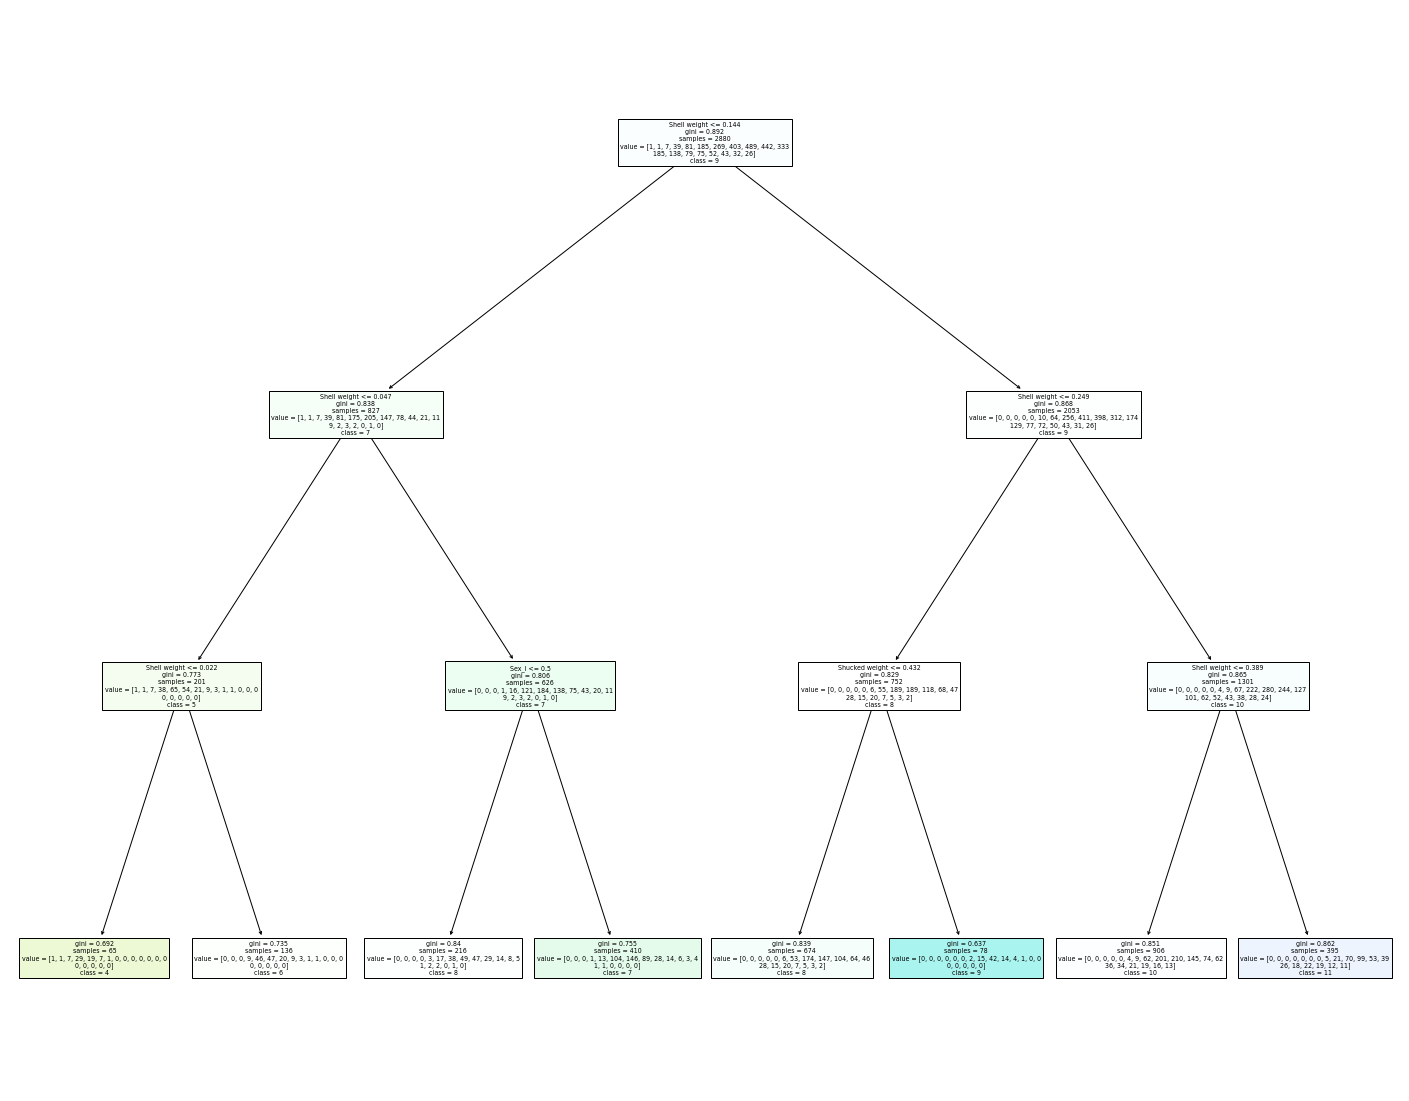

In [46]:
# Drawing Decision Tree
from sklearn import tree

target_attribute = list(set(abalone_data["Rings"]))
target_attribute = [str(target_attribute[i]) for i in range(len(target_attribute))]
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 
          'Sex_M']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt, feature_names = columns, class_names = target_attribute, filled = True)
fig.savefig("decision_tree.jpeg")
